In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])

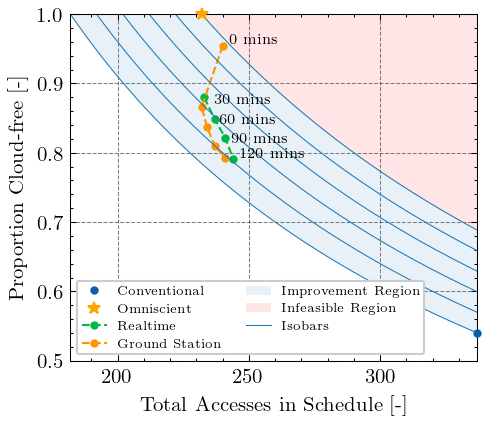

In [ ]:

# Data
total_realtime = [233, 237, 241, 244] 
prop_realtime = [np.float64(0.8798283261802575), np.float64(0.8481012658227848), 
                 np.float64(0.8215767634854771), np.float64(0.790983606557377)]
total_gs = [240, 232, 234, 237, 241] 
prop_gs = [np.float64(0.9541666666666667), np.float64(0.8663793103448276), 
           np.float64(0.8376068376068376), np.float64(0.810126582278481), 
           np.float64(0.7925311203319502)]
total_conventional = 337
prop_conventional = 0.5400593471810089
total_omni = 232
prop_omni = 1.0

delays = [0, 30, 60, 90, 120]

# Calculate constant products
C_conventional = total_conventional * prop_conventional  # lower bound constant (~337*0.54006)
C_omni = total_omni * prop_omni  # omniscient constant (232)

# Create figure and axis
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=150)

# Annotate realtime points
annotations = [(3, 0), (6, 0), (6, 0), (8, 0), (7, -1)]
for i, txt in enumerate(delays):
#     if(i == 0):
#         continue
    ax.annotate(f"{txt} mins", (total_gs[i], prop_gs[i]),
                textcoords="offset points", xytext=annotations[i],
                ha='left', va ="bottom", fontsize=7)

# Plot the data points for conventional, omniscient, realtime, and ground station
ax.plot(total_conventional, prop_conventional, '.', label='Conventional', 
        zorder=10, clip_on=False)
ax.plot(total_omni, prop_omni, '*', label='Omniscient', color='orange', 
        zorder=10, clip_on=False)
ax.plot(total_realtime, prop_realtime, '.--', label='Realtime')
ax.plot(total_gs, prop_gs, '.--', label='Ground Station')

# Colors for patches and isobars
improve_color = 'tab:blue'
infeasible_color = 'red'

# Define full x-domain from C_conventional to total_conventional
x_all = np.linspace(C_conventional, total_conventional, 400)

# Split the x-domain at x = C_omni
x_left = x_all[x_all <= C_omni]   # x values where omniscient isobar would be > 1 (so not used)
x_right = np.insert(x_all[x_all >= C_omni], 0, x_left[-1], 0)  # x values where omniscient isobar is defined

# For x in [C_conventional, C_omni]: fill entire region (from lower hyperbola to y=1) as improvement
ax.fill_between(x_left, C_conventional/x_left, 1, facecolor=improve_color, alpha=0.1, 
                label="Improvement Region")

# For x in [C_omni, total_conventional]:
# Blue patch: improvement region from lower hyperbola to omniscient isobar (y = C_omni/x)
ax.fill_between(x_right, C_conventional/x_right, C_omni/x_right, facecolor=improve_color, alpha=0.1)
# Red patch: infeasible region from omniscient isobar to y=1
ax.fill_between(x_right, C_omni/x_right, 1, facecolor=infeasible_color, alpha=0.1, 
                label="Infeasible Region")

# Plot 5 isobars between the conventional and omniscient constants using blue
num_isobars = 6
constants = np.linspace(C_conventional, C_omni, num_isobars)
for i, C in enumerate(constants):
    # For a given constant C, y = C/x; valid only for x >= max(C, C_conventional)
    x_vals = np.linspace(max(C, C_conventional), total_conventional, 200)
    y_vals = C / x_vals
    ax.plot(x_vals, y_vals, color=improve_color, linewidth=0.5, label="Isobars" if i == 0 else "")

# Set labels, limits, and legend
ax.set_xlabel('Total Accesses in Schedule [-]')
ax.set_ylabel('Proportion Cloud-free [-]')
ax.set_ylim(0.5, 1)
ax.set_xlim(C_conventional, total_conventional)
ax.legend(fontsize=6, ncol=2, loc='lower left')
# plt.tight_layout()

# Save and display the plot
plt.savefig('delayed_vs_omn.pdf')
plt.show()
